### Pandas를 이용한 데이터 불러오기 & 정리

In [3]:
import pandas as pd

In [10]:
CCTV_Seoul = pd.read_csv('C:\\Users\\shin\\Desktop\\CCTV_in_Seoul.csv', encoding = 'utf-8') #인코딩이 안되면 engine = 'python'으로 해보세요!
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [3]:
CCTV_Seoul.columns.values[0] = '구별'
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
pop_Seoul = pd.read_excel('C:\\Users\\shin\\Desktop\\study\\data\\population_in_Seoul.xls', 
                          header = 2, parse_cols = 'B, D, G, J, N', encoding = 'utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [ ]:
#방금 생성한 pop_Seoul 객체의 칼럼 이름을 위와 같이 만들어 보세요!

In [7]:
#맨 위의 ‘합계’ 행을 삭제해 보세요! (drop 이용)

In [9]:
CCTV_Seoul.sort_values(by = '소계', ascending = True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [8]:
CCTV_Seoul.sort_values(by = '소계', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [11]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [12]:
#'최근증가율' 칼럼을 기준으로 내림차순 정렬!

In [15]:
#CCTV_Seoul 객체와 pop_Seoul 객체를 다음과 같이 통합해 보세요! (merge 함수 이용, 만들어진 객체의 이름은 'data_result'으로)

In [ ]:
#'2013년도 이전', '2014년', '2015년', '2016년' 칼럼을 삭제해 주세요

In [28]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자
구별,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085
강동구,1010,166.490765,431920,427573,4347,58770
강북구,831,125.203252,322915,319164,3751,58196
강서구,911,134.793814,603611,596949,6662,79660
관악구,2109,149.290780,520040,501957,18083,72249


In [23]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[ 1.        ,  0.22152789],
       [ 0.22152789,  1.        ]])

In [24]:
np.corrcoef(data_result['한국인'], data_result['소계'])

array([[ 1.        ,  0.21698466],
       [ 0.21698466,  1.        ]])

### Matplotlib을 이용한 시각화

In [25]:
import matplotlib.pyplot as plt #matplotlib가 한글폰트를 지원 안해서 미리 처리해주는 과정
import platform                 #아마 요즘 matplotlib는 이런거 안해도 잘 될수도 있어요!

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

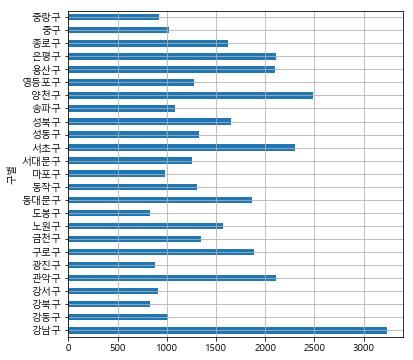

In [29]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(6,6)) #bar는 수직바, barh는 수평바(horizontal)
plt.show()

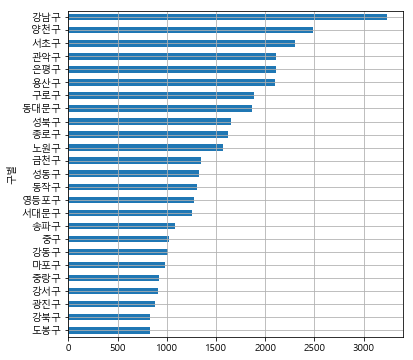

In [30]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))
plt.show()

In [34]:
#(6,6) 사이즈의 '인구수'와 '소계'를 축으로 하는 scatter plot을 그리고 grid와 label도 달아 주세요.

In [31]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([  1.07336946e-03,   1.08384235e+03])

In [33]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

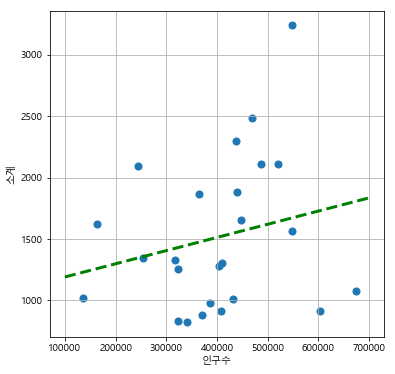

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

### Quest

In [39]:
#1.
#데이터셋’ 폴더의 CCTV_in_Seoul.csv, population_in_Seoul.csv를 이용, 
#pandas / numpy를 통해 아래와 같은 형태로 데이터를 정리해 볼 것. 
#'외국인비율’ = ‘외국인’ / ‘인구수’ * 100, ‘고령자비율’ = ‘고령자’ / ‘인구수’ * 100
#‘오차’ – l소계 – 회귀직선(인구수)l , 오차는 np.abs를 활용

In [40]:
#2
#(1)에서 정리한 데이터를 ‘오차’ 컬럼을 기준으로 색깔을 입혀서 시각화 해보고
#이를 통해 무엇을 파악할 수 있는지 주석으로 간략하게 1-2줄로 서술해보기. (plt.colormap, plt.text 로 컬러맵과 이름 추가)
